### Importing packages and reading dataset

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn import tree
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [77]:
x=pd.read_csv("supply_chain.csv",encoding='latin1')
print(x.shape)

(10324, 33)


In [78]:
x.head(10)

,ï»¿ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,CÃ´te d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,Yes,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,Yes,643,Freight Included in Commodity Cost,NaN


In [79]:
x.describe()

,ï»¿ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19040\513174798.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

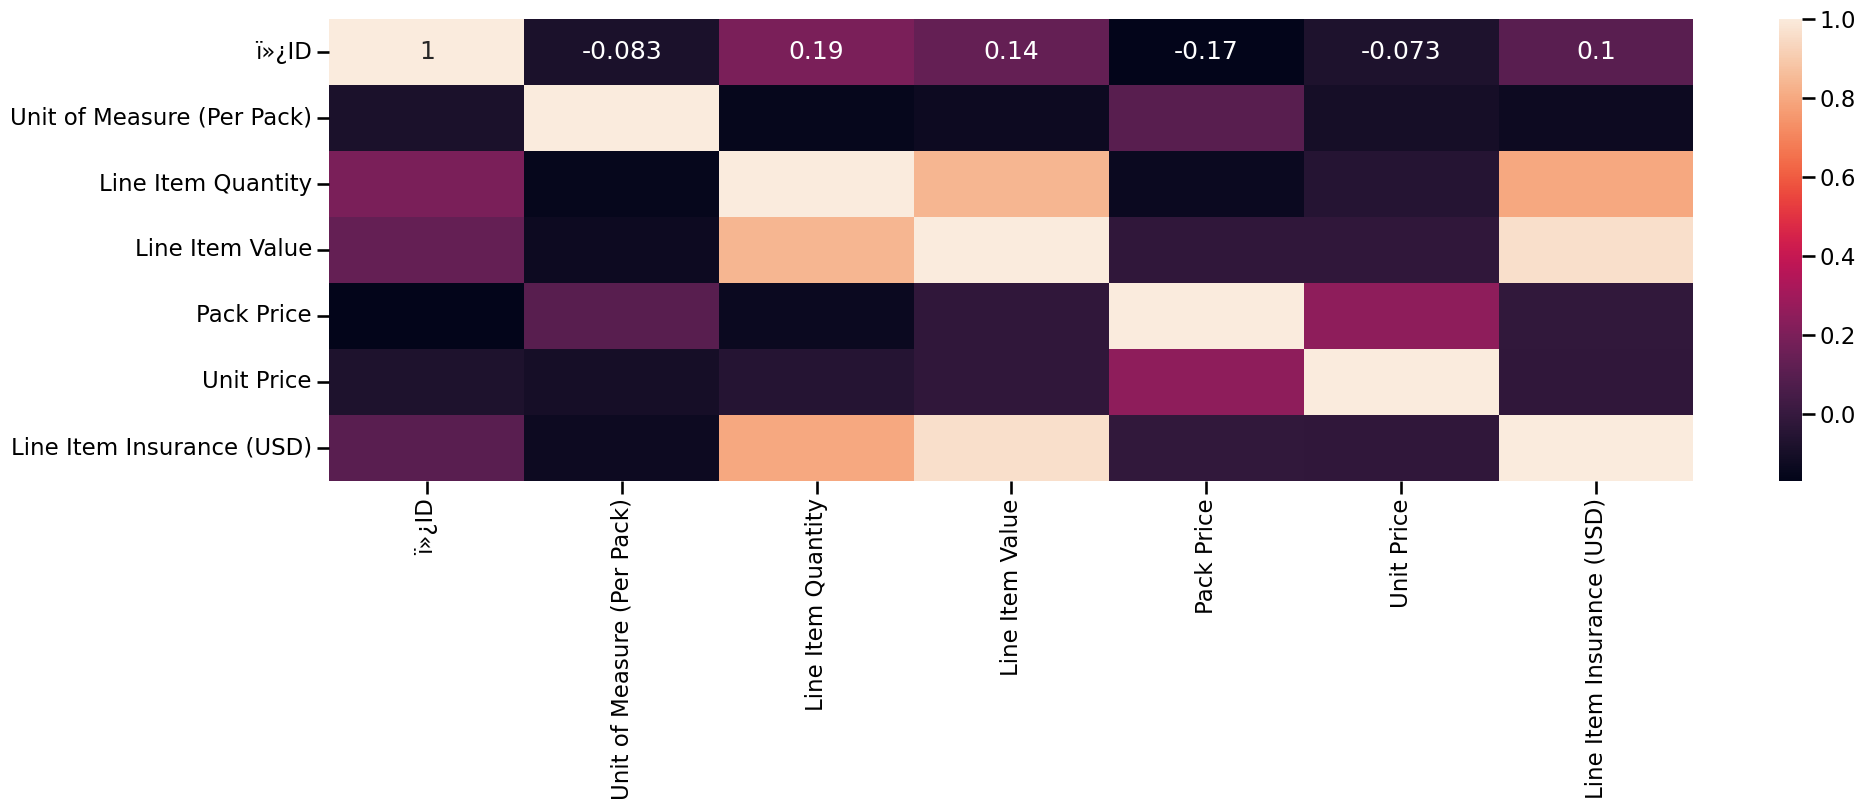

In [80]:
plt.figure(figsize=(22,6))
sns.heatmap(x.corr(),annot=True)

## Data Cleaning

In [81]:
# So here we have to focus on columns: Shipment Mode, Dosage ,Line Item Insurance (USD) 
x.isnull().sum()

ï»¿ID                              0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [82]:
# Checking th epercentage of missing values
print("Null values in Percentage")
(x.isnull().sum()/x.shape[0])*100

Null values in Percentage


ï»¿ID                            0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

In [83]:
#### # Dropping Unnecessary columns


In [84]:
x=x.drop(columns=['PQ #','PO / SO #','ASN/DN #','Managed By','Fulfill Via','Vendor INCO Term','PQ First Sent to Client Date','Product Group','Vendor','ï»¿ID'])
x.head()

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,CÃ´te d'Ivoire,Air,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,108-VN-T01,Vietnam,Air,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,100-CI-T01,CÃ´te d'Ivoire,Air,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,108-VN-T01,Vietnam,Air,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,Adult,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,108-VN-T01,Vietnam,Air,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,Adult,"Stavudine 30mg, capsules, 60 Caps",Stavudine,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


##### 1) Line Item Insaurance

<Axes: ylabel='Line Item Insurance (USD)'>

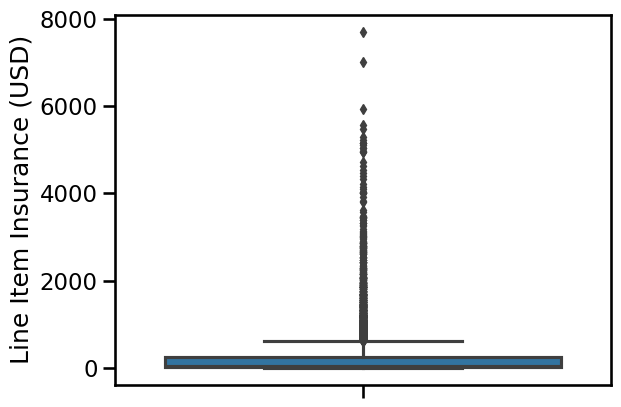

In [85]:
sns.boxplot(y=x['Line Item Insurance (USD)'])

In [86]:
x['Line Item Insurance (USD)']=x['Line Item Insurance (USD)'].fillna(x['Line Item Insurance (USD)'].median())
x['Line Item Insurance (USD)'].values[x['Line Item Insurance (USD)'].values>1000]=x['Line Item Insurance (USD)'].median()
x['Line Item Insurance (USD)'].values[x['Line Item Insurance (USD)'].values>200]=x['Line Item Insurance (USD)'].mean()

<Axes: ylabel='Line Item Insurance (USD)'>

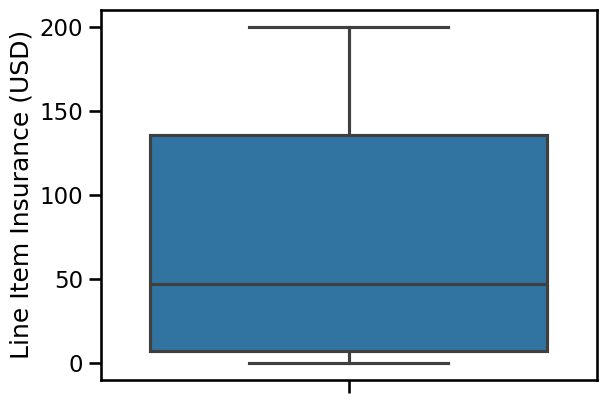

In [87]:
sns.boxplot(y=x['Line Item Insurance (USD)'])

##### Feight Cost (USD)

In [88]:
x['Freight Cost (USD)'].values

array(['780.34', '4521.5', '1653.78', ...,
       'Freight Included in Commodity Cost',
       'Freight Included in Commodity Cost',
       'Freight Included in Commodity Cost'], dtype=object)

In [89]:
x=x.loc[~x['Freight Cost (USD)'].str.contains('Freight Included in Commodity Cost')]
x=x.loc[~x['Freight Cost (USD)'].str.contains('Invoiced Separately')]
x=x.loc[~x['Freight Cost (USD)'].str.contains('See')]

In [90]:
x['Freight Cost (USD)'].values

array(['780.34', '4521.5', '1653.78', ..., '3785.72', '26180', '3410'],
      dtype=object)

In [91]:
x.shape

(6198, 23)

In [92]:
x.head(10)

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,CÃ´te d'Ivoire,Air,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,47.04
1,108-VN-T01,Vietnam,Air,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,47.04
2,100-CI-T01,CÃ´te d'Ivoire,Air,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,47.04
3,108-VN-T01,Vietnam,Air,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,Adult,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,47.04
4,108-VN-T01,Vietnam,Air,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,Adult,"Stavudine 30mg, capsules, 60 Caps",Stavudine,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,47.04
5,112-NG-T01,Nigeria,Air,Date Not Captured,28-Sep-06,28-Sep-06,28-Sep-06,Pediatric,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",Zidovudine,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",Yes,504,5920.42,47.04
7,109-TZ-T01,Tanzania,Air,Date Not Captured,24-Nov-06,24-Nov-06,24-Nov-06,Adult,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",Yes,1478,6212.41,47.04
11,110-ZM-T01,Zambia,Air,Date Not Captured,8-Jan-07,8-Jan-07,8-Jan-07,HIV test,"HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",...,20,2500,100000.00,40.00,2.00,"Trinity Biotech, Plc",Yes,853,13569.49,47.04
13,107-RW-T01,Rwanda,Air,12/22/06,27-Feb-07,27-Feb-07,27-Feb-07,Adult,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416,64179.42,47.04
14,106-HT-T01,Haiti,Air,Date Not Captured,18-Jan-07,18-Jan-07,18-Jan-07,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,750,60000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,256,1760.32,47.04


#### Shipment mode

In [93]:
x['Shipment Mode'].values

array(['Air', 'Air', 'Air', ..., 'Truck', 'Air Charter', 'Air Charter'],
      dtype=object)

In [94]:
x['Shipment Mode']=x['Shipment Mode'].fillna(x['Shipment Mode'].mode()[0])

In [95]:
x['Shipment Mode'].isnull().sum()

0

In [96]:
x['Shipment Mode']

0                Air
1                Air
2                Air
3                Air
4                Air
            ...     
10305          Truck
10306          Truck
10310          Truck
10315    Air Charter
10316    Air Charter
Name: Shipment Mode, Length: 6198, dtype: object

#### Dosage 


In [97]:
print(x['Dosage'].values)

[nan '10mg/ml' nan ... '30/50/60mg' '200/50mg' '150/300mg']


In [98]:
print(x['Dosage'].mode())

0    300mg
Name: Dosage, dtype: object


In [99]:
print(x['Dosage'].mode())
x['Dosage']=x['Dosage'].fillna(x['Dosage'].mode()[0])

0    300mg
Name: Dosage, dtype: object


In [100]:
x['Dosage'].isnull().sum()

0

#### Weight (Kilograms)

In [101]:
x['Weight (Kilograms)'].unique()

array(['13', '358', '171', ..., '1504', '15198', '1547'], dtype=object)

In [102]:
x=x.loc[~x['Weight (Kilograms)'].str.contains('Weight Captured Separately')]


In [103]:
x=x.loc[~x['Weight (Kilograms)'].str.contains('See')]

In [104]:
x['Weight (Kilograms)']

0           13
1          358
2          171
3         1855
4         7590
         ...  
10305    39688
10306     1504
10310     2253
10315    15198
10316     1547
Name: Weight (Kilograms), Length: 6175, dtype: object

<Axes: >

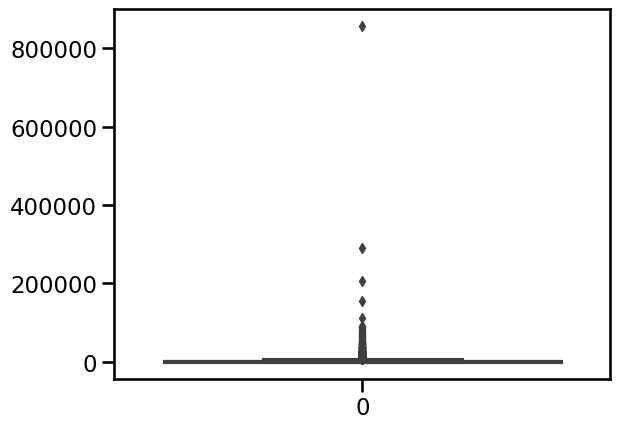

In [105]:
sns.boxplot(x['Weight (Kilograms)'])

#### PO Sent to Vendor Date

In [106]:
x['PO Sent to Vendor Date'].values


array(['Date Not Captured', 'Date Not Captured', 'Date Not Captured', ...,
       'N/A - From RDC', 'N/A - From RDC', 'N/A - From RDC'], dtype=object)

In [107]:
x['PO Sent to Vendor Date'].unique()


array(['Date Not Captured', '12/22/06', '4/12/07', '5/13/07', '5/17/07',
       '7/4/07', '7/26/07', '10/3/07', '8/28/07', '11/19/07', '11/21/07',
       '12/10/07', '2/27/08', '3/3/08', '2/28/08', '3/17/08', '3/13/08',
       '3/18/08', '3/31/08', '5/14/08', '5/15/08', '5/20/08', '5/23/08',
       '7/1/08', '7/2/08', '7/3/08', '7/24/08', '7/25/08', '7/31/08',
       '8/27/08', '9/3/08', '9/24/08', '10/2/08', '12/19/08', '1/5/09',
       '1/16/09', '10/21/08', '2/5/09', '2/18/09', '3/4/09', '3/6/09',
       '3/25/09', '3/30/09', '4/2/09', '4/4/09', '4/9/09', '4/15/09',
       '4/29/09', '5/27/09', '5/18/09', '6/2/09', '4/19/06', '11/15/06',
       '1/9/07', '2/7/07', '12/14/06', '7/3/07', '11/12/07', '11/30/07',
       '12/3/07', '12/5/07', '2/4/08', '1/29/08', '2/19/08', '2/25/08',
       '2/29/08', '5/13/08', '6/12/08', '6/13/08', '8/21/08', '7/18/08',
       '7/28/08', '7/30/08', '8/22/08', '10/27/08', '11/3/08', '11/20/08',
       '12/23/08', '1/13/09', '2/3/09', '3/11/09', '3/19/0

In [108]:
x=x.loc[~x['PO Sent to Vendor Date'].str.contains('Date Not Captured')]
x=x.loc[~x['PO Sent to Vendor Date'].str.contains('N/A - From RDC')]

In [109]:
print(x['PO Sent to Vendor Date'])
print(x['PO Sent to Vendor Date'].unique)

13      12/22/06
18       4/12/07
19       5/13/07
20       5/17/07
22        7/4/07
          ...   
6563     6/17/10
6566     6/17/10
6570     7/12/12
6573     3/19/10
6578      2/5/13
Name: PO Sent to Vendor Date, Length: 2909, dtype: object
<bound method Series.unique of 13      12/22/06
18       4/12/07
19       5/13/07
20       5/17/07
22        7/4/07
          ...   
6563     6/17/10
6566     6/17/10
6570     7/12/12
6573     3/19/10
6578      2/5/13
Name: PO Sent to Vendor Date, Length: 2909, dtype: object>


In [110]:
x.shape

(2909, 23)

In [111]:
x.head()

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
13,107-RW-T01,Rwanda,Air,12/22/06,27-Feb-07,27-Feb-07,27-Feb-07,Adult,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",Yes,7416,64179.42,47.04
18,109-TZ-T01,Tanzania,Air,4/12/07,6-Jun-07,6-Jun-07,6-Jun-07,Pediatric,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,...,200,712,8964.08,12.59,0.06,"BMS Meymac, France",Yes,162,912.96,47.04
19,102-NG-T01,Nigeria,Air,5/13/07,19-Jun-07,19-Jun-07,19-Jun-07,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,1000,80000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.00
20,102-NG-T01,Nigeria,Air,5/17/07,19-Jun-07,19-Jun-07,19-Jun-07,HIV test,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",...,20,7500,202500.00,27.00,1.35,Chembio Diagnostics Sys. Inc.,Yes,2278,15893.71,47.04
22,108-VN-T01,Vietnam,Air,7/4/07,15-Oct-07,15-Oct-07,15-Oct-07,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07


In [112]:
x[['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']]

,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date
13,27-Feb-07,27-Feb-07,27-Feb-07
18,6-Jun-07,6-Jun-07,6-Jun-07
19,19-Jun-07,19-Jun-07,19-Jun-07
20,19-Jun-07,19-Jun-07,19-Jun-07
22,15-Oct-07,15-Oct-07,15-Oct-07
...,...,...,...
6563,4-Mar-11,4-Mar-11,4-Mar-11
6566,20-Dec-10,12-Jan-11,12-Jan-11
6570,8-Oct-12,8-Oct-12,8-Oct-12
6573,7-Sep-10,17-Nov-10,17-Nov-10


## Feature Engineering


In [113]:
for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        x[column] = pd.to_datetime(x[column])
        x[column + ' Year'] = x[column].apply(lambda x: x.year)
        x[column + ' Month'] = x[column].apply(lambda x: x.month)
        x[column + ' Day'] = x[column].apply(lambda x: x.day)
        x = x.drop(column, axis=1)

In [114]:
x[['Scheduled Delivery Date Year','Scheduled Delivery Date Month','Scheduled Delivery Date Day', 'Delivered to Client Date Year','Delivered to Client Date Month']]

,Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month
13,2007,2,27,2007,2
18,2007,6,6,2007,6
19,2007,6,19,2007,6
20,2007,6,19,2007,6
22,2007,10,15,2007,10
...,...,...,...,...,...
6563,2011,3,4,2011,3
6566,2010,12,20,2011,1
6570,2012,10,8,2012,10
6573,2010,9,7,2010,11


In [115]:
x[['Delivered to Client Date Day' ,'Delivery Recorded Date Year','Delivery Recorded Date Month','Delivery Recorded Date Day']].head(7)

,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
13,27,2007,2,27
18,6,2007,6,6
19,19,2007,6,19
20,19,2007,6,19
22,15,2007,10,15
23,27,2007,8,27
24,21,2007,8,21


In [116]:
x[['Shipment Mode','Scheduled Delivery Date Year','Scheduled Delivery Date Month']].head(7)

,Shipment Mode,Scheduled Delivery Date Year,Scheduled Delivery Date Month
13,Air,2007,2
18,Air,2007,6
19,Air,2007,6
20,Air,2007,6
22,Air,2007,10
23,Air,2007,8
24,Air,2007,8


In [225]:
x['Delivered to Client Date Day'].values[x['Shipment Mode'].values==0]+=2

In [226]:
x['Delivered to Client Date Day'].values[x['Shipment Mode'].values==1]+=4

In [227]:
x['Delivered to Client Date Day'].values[x['Shipment Mode'].values==2]+=1

In [228]:
x['Delivered to Client Date Day'].values[x['Shipment Mode'].values==3]

array([22], dtype=int64)

In [229]:
x['Delivery Client Date Day'].values[x['Shipment Mode'].values==3]+=7

In [231]:
x['Delivery Recorded Date Day'].values[x['Shipment Mode'].values==0]+=2

In [232]:
x['Delivery Recorded Date Day'].values[x['Shipment Mode'].values==1]+=4

In [233]:
x['Delivery Recorded Date Day'].values[x['Shipment Mode'].values==2]+=1

In [234]:
x['Delivery Recorded Date Day'].values[x['Shipment Mode'].values==3]+=7

In [235]:
x.head()

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Sub Classification,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
13,107-RW-T01,Rwanda,0,12/22/06,1,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,...,47.04,2007,2,27,2007,2,29,2007,2,29
18,109-TZ-T01,Tanzania,0,4/12/07,5,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,Videx,2g,Powder for oral solution,...,47.04,2007,6,6,2007,6,8,2007,6,8
19,102-NG-T01,Nigeria,0,5/13/07,2,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,...,128.00,2007,6,19,2007,6,21,2007,6,21
20,102-NG-T01,Nigeria,0,5/17/07,2,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",Stat-Pak,300mg,Test kit,...,47.04,2007,6,19,2007,6,21,2007,6,21
22,108-VN-T01,Vietnam,0,7/4/07,5,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,...,3.07,2007,10,15,2007,10,17,2007,10,17


## Data Visualization

Total Pack Price for Top 15 Countries

Country
Nigeria           13225.79
Haiti              9664.05
CÃ´te d'Ivoire     9400.28
Vietnam            9295.16
Uganda             9049.07
Tanzania           6284.35
Mozambique         5607.02
Zambia             5344.88
Kenya              5253.44
Botswana           5004.50
Rwanda             4588.29
Guyana             3699.85
Cameroon           3011.94
Zimbabwe           2927.43
Namibia            2696.80
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

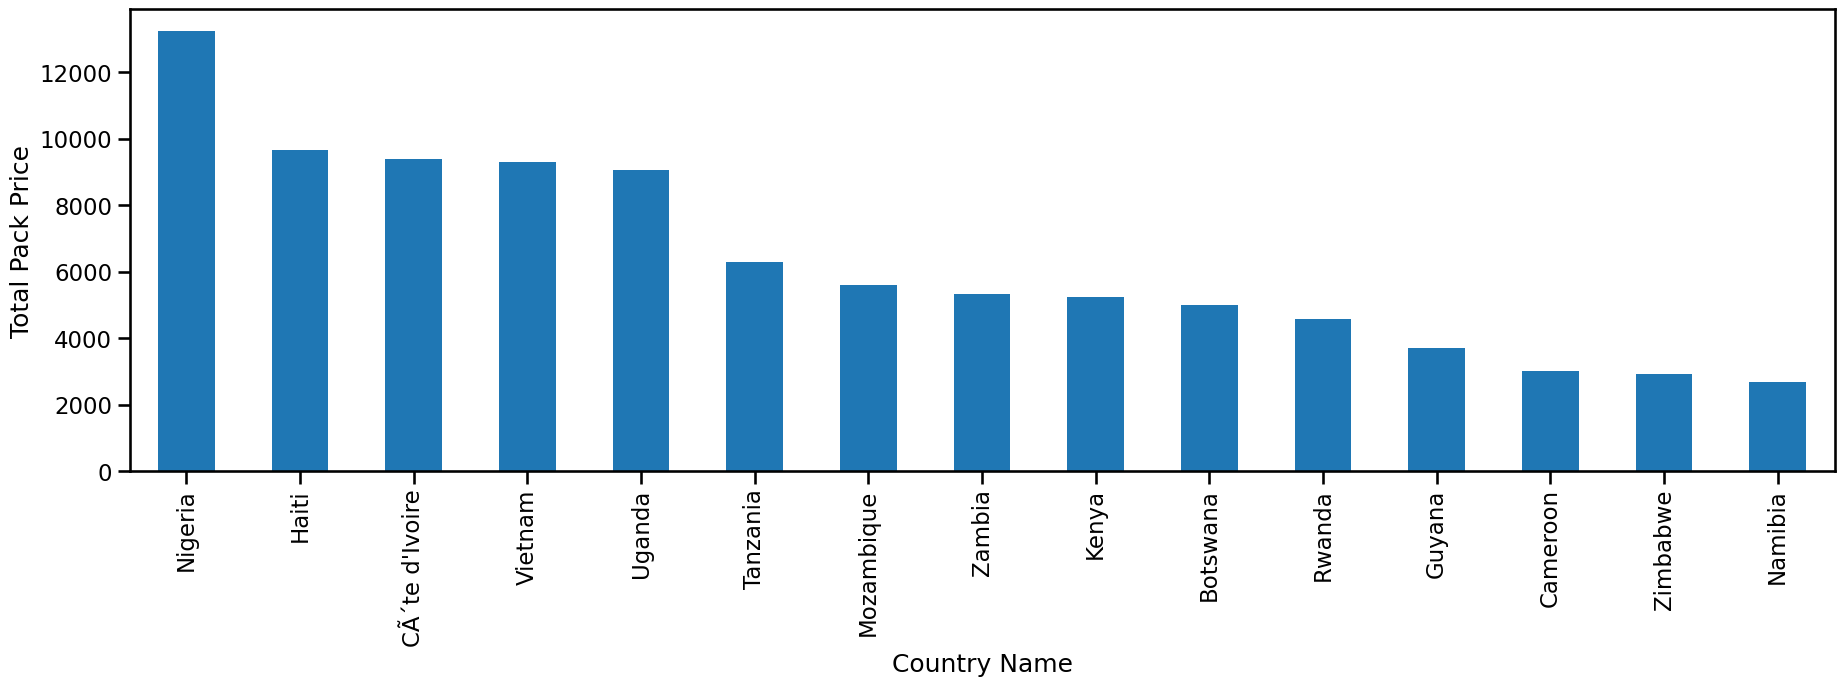

In [123]:
#Total Pack Price for Top 15 Countries with graph
TotalPrice = x.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=x.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

In [124]:
# Pie Chart of column Shipment Mode
ShippingMode = x["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))
trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

Manufacturing Site
Aurobindo Unit III, India         467
Alere Medical Co., Ltd.           357
Trinity Biotech, Plc              261
Inverness Japan                   236
Mylan (formerly Matrix) Nashik    233
ABBVIE Ludwigshafen Germany       197
Hetero Unit III Hyderabad IN      161
Cipla, Goa, India                 128
ABBVIE (Abbott) Logis. UK         110
Chembio Diagnostics Sys. Inc.     110
dtype: int64


Text(0.5, 0, 'Manufacturing Site')

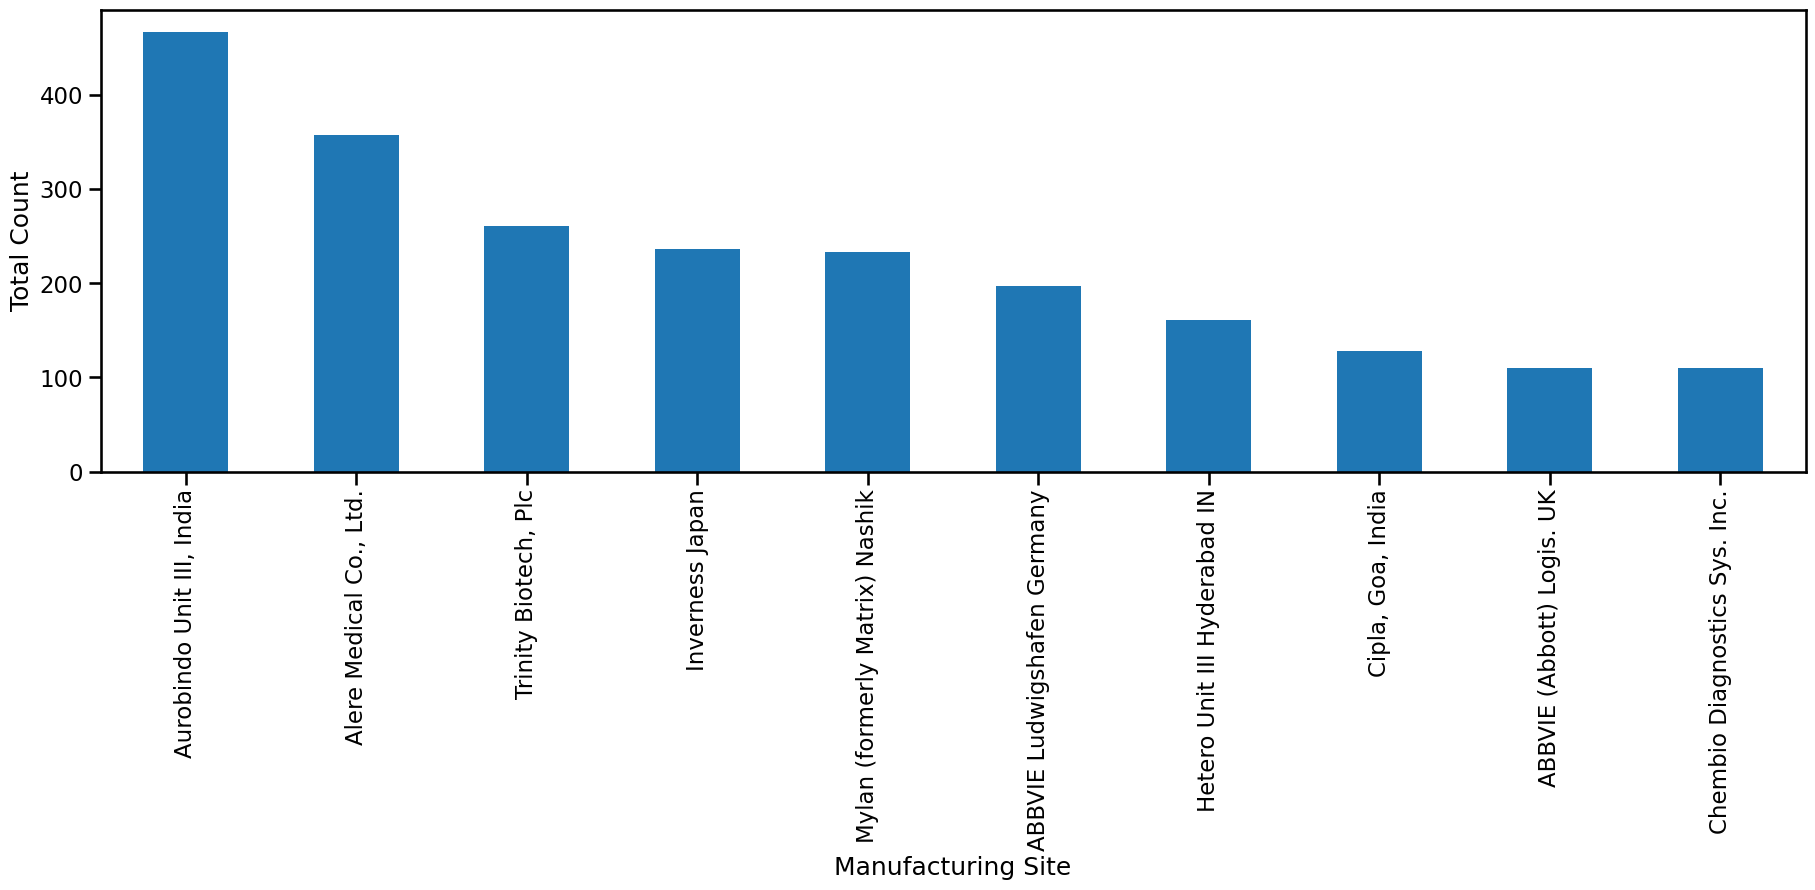

In [125]:
# Count of Manufacturing Site name
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=x.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site')

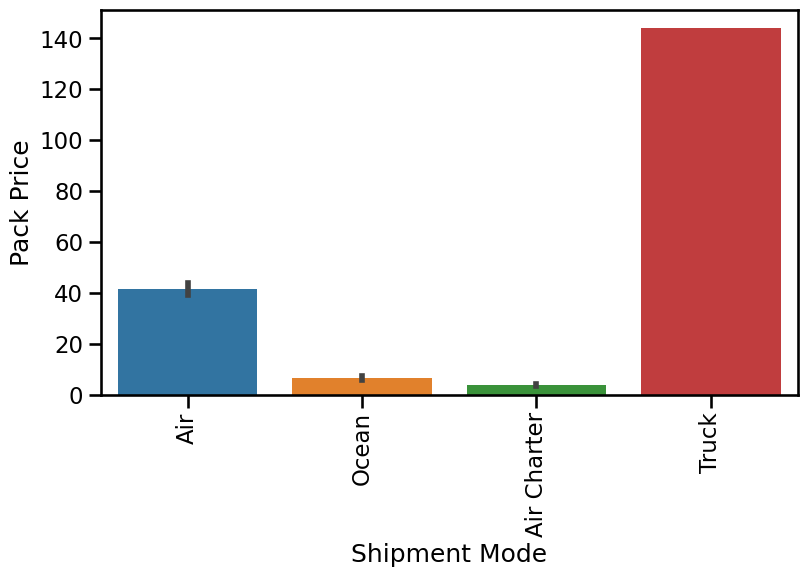

In [126]:
#Shipment mode vs PackPrice
plt.figure(figsize = (9,5))
plt.xticks(rotation = 90)
sns.barplot(x='Shipment Mode',y='Pack Price', data = x)
plt.show()

Text(0, 0.5, 'Country')

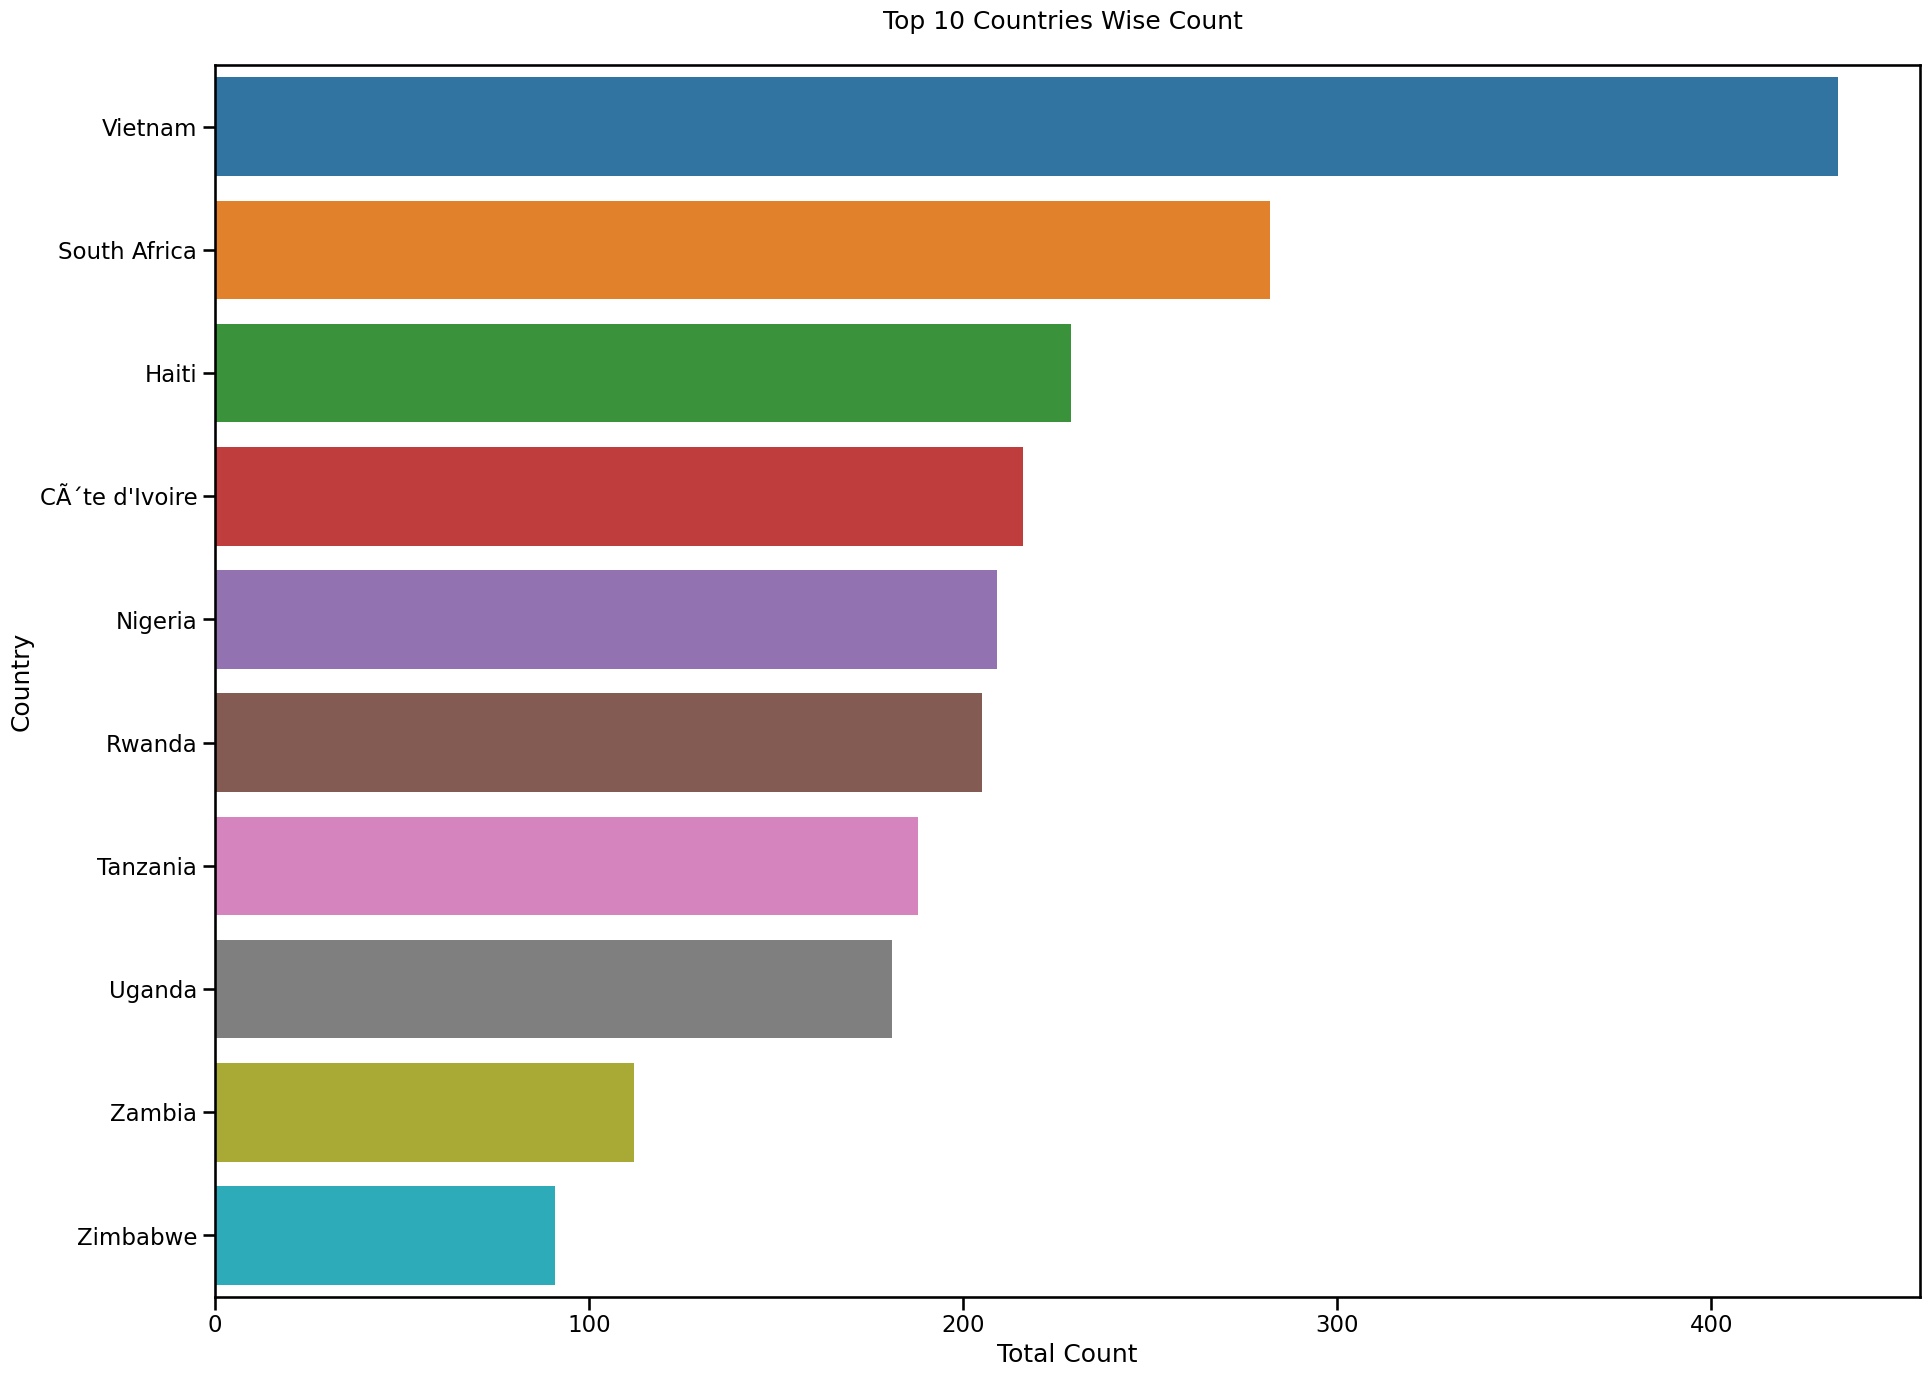

In [127]:
# Country Wise Count
ItemCount = x["Country"].value_counts().nlargest(10)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,16))
sns.countplot(y=x['Country'],order = x['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.xlabel('Total Count')
plt.ylabel('Country')

#### Insights
* From the pie chart we can observe that most used shipment mode is air(89.9%) followed by ocean(9.52%),Followed by Air Charter(0.584%),followed by Truck(0.0334%).

* From the barplot of the 'Shipment Mode' vs 'Pack Price' ,we can observe that people send their goods in large proportion through trucks.

* from the count plot of 'total count vs country' we can observe that vietnam has exported large number of drugs.

* from the bar plot of 'Manufacturing Site' vs 'Total Count' we can observe that top two manufacturing sites are in India

In [132]:
x.columns

Index(['Project Code', 'Country', 'Shipment Mode', 'PO Sent to Vendor Date',
       'Sub Classification', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)',
       'Scheduled Delivery Date Year', 'Scheduled Delivery Date Month',
       'Scheduled Delivery Date Day', 'Delivered to Client Date Year',
       'Delivered to Client Date Month', 'Delivered to Client Date Day',
       'Delivery Recorded Date Year', 'Delivery Recorded Date Month',
       'Delivery Recorded Date Day'],
      dtype='object')

In [54]:
x.head(7)

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Sub Classification,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
13,107-RW-T01,Rwanda,Air,12/22/06,Adult,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,...,47.04,2007,2,27,2007,2,27,2007,2,27
18,109-TZ-T01,Tanzania,Air,4/12/07,Pediatric,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,Videx,2g,Powder for oral solution,...,47.04,2007,6,6,2007,6,6,2007,6,6
19,102-NG-T01,Nigeria,Air,5/13/07,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,...,128.00,2007,6,19,2007,6,19,2007,6,19
20,102-NG-T01,Nigeria,Air,5/17/07,HIV test,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",Stat-Pak,300mg,Test kit,...,47.04,2007,6,19,2007,6,19,2007,6,19
22,108-VN-T01,Vietnam,Air,7/4/07,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,...,3.07,2007,10,15,2007,10,15,2007,10,15
23,108-VN-T01,Vietnam,Air,7/4/07,Adult,"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,...,65.75,2007,8,27,2007,8,27,2007,8,27
24,100-HT-T01,Haiti,Air,7/26/07,HIV test,"HIV 1/2, Determine HIV Kit, without Lancets, 1...","HIV 1/2, Determine HIV Kit, without Lancets",Determine,300mg,Test kit,...,86.39,2007,8,13,2007,8,21,2007,8,21


In [55]:
x[['Unit Price','First Line Designation','Weight (Kilograms)','Freight Cost (USD)','Line Item Insurance (USD)']].head(7)

,Unit Price,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
13,0.17,Yes,7416,64179.42,47.04
18,0.06,Yes,162,912.96,47.04
19,0.80,Yes,341,2682.47,128.00
20,1.35,Yes,2278,15893.71,47.04
22,0.01,Yes,941,4193.49,3.07
23,0.68,Yes,117,1767.38,65.75
24,0.72,Yes,171,3518.38,86.39


In [135]:
x['Freight Cost (USD)'].dtype

dtype('O')

In [138]:
print(x['Freight Cost (USD)'].unique)

<bound method Series.unique of 13      64179.42
18        912.96
19       2682.47
20      15893.71
22       4193.49
          ...   
6563    10984.82
6566     5460.48
6570     1454.64
6573     4263.07
6578      817.99
Name: Freight Cost (USD), Length: 2909, dtype: float64>


In [137]:
x['Freight Cost (USD)'] = pd.to_numeric(x['Freight Cost (USD)'], errors='coerce')


## Data preprocessing

In [139]:
le=LabelEncoder()
x['Shipment Mode']=le.fit_transform(x['Shipment Mode'])
# air=0,ocean=2,air charter=1,truck=3

In [140]:
x['Sub Classification']=le.fit_transform(x['Sub Classification'])

In [141]:
x['First Line Designation']=le.fit_transform(x['First Line Designation'])

In [142]:
x['Weight (Kilograms)'] = x['Weight (Kilograms)'].astype(int)

In [143]:
x.columns


Index(['Project Code', 'Country', 'Shipment Mode', 'PO Sent to Vendor Date',
       'Sub Classification', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)',
       'Scheduled Delivery Date Year', 'Scheduled Delivery Date Month',
       'Scheduled Delivery Date Day', 'Delivered to Client Date Year',
       'Delivered to Client Date Month', 'Delivered to Client Date Day',
       'Delivery Recorded Date Year', 'Delivery Recorded Date Month',
       'Delivery Recorded Date Day'],
      dtype='object')

In [144]:
import xgboost as xgb


## ML Models
* Using DecisionTrees to provide the most optimal path with respect to features like Deliverytime,cost,Pack Price etc.

In [165]:
xtrain=x[['Sub Classification','Unit of Measure (Per Pack)','Scheduled Delivery Date Year','Scheduled Delivery Date Month','Scheduled Delivery Date Day','Delivered to Client Date Year','Delivered to Client Date Month','Delivered to Client Date Day','Delivery Recorded Date Year','Delivery Recorded Date Month','Delivery Recorded Date Day','Line Item Quantity','Line Item Value','Pack Price','First Line Designation','Weight (Kilograms)','Freight Cost (USD)']]
ytrain=x['Shipment Mode']

In [166]:
x_train=xtrain.iloc[:, ]
y_train=ytrain.iloc[:,]

In [167]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.25,random_state=42)


In [168]:
model=DecisionTreeClassifier(criterion='gini',splitter='best')
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [169]:
print('Testing Accuracy:',model.score(xtest,ytest))


Testing Accuracy: 0.9313186813186813


In [170]:
predictions=model.predict(xtest)

In [171]:
matrix=confusion_matrix(ytest,predictions)
matrix

array([[622,   4,  24],
       [  0,   3,   0],
       [ 21,   1,  53]], dtype=int64)

In [172]:
value_counts=dict(x['Shipment Mode'].value_counts())
print(value_counts)

{0: 2614, 2: 277, 1: 17, 3: 1}


In [173]:
for key,value in value_counts.items():
    value_counts[key]=value/len(x)
    
print(value_counts)

{0: 0.8985905809556549, 2: 0.09522172567892746, 1: 0.005843932622894466, 3: 0.00034376074252320387}


In [174]:
class_weights={}
for key,value in value_counts.items():
    class_weights[key]=sum(value_counts.values())-value/sum(value_counts.values())    
class_weights

{0: 0.10140941904434553,
 2: 0.9047782743210728,
 1: 0.9941560673771057,
 3: 0.999656239257477}

In [175]:
model_tree=DecisionTreeClassifier(max_depth=8,criterion='gini',splitter='best',class_weight=class_weights)
model_tree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight={0: 0.10140941904434553,
                                     1: 0.9941560673771057,
                                     2: 0.9047782743210728,
                                     3: 0.999656239257477},
                       max_depth=8)

In [176]:
print("Testing Accuracy:",model.score(xtest,ytest))
y_pred=model.predict(xtest)


Testing Accuracy: 0.9313186813186813


In [177]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.9313186813186813


In [178]:
predictions=model.predict(xtest)
matrix=confusion_matrix(ytest,predictions)
matrix

array([[622,   4,  24],
       [  0,   3,   0],
       [ 21,   1,  53]], dtype=int64)

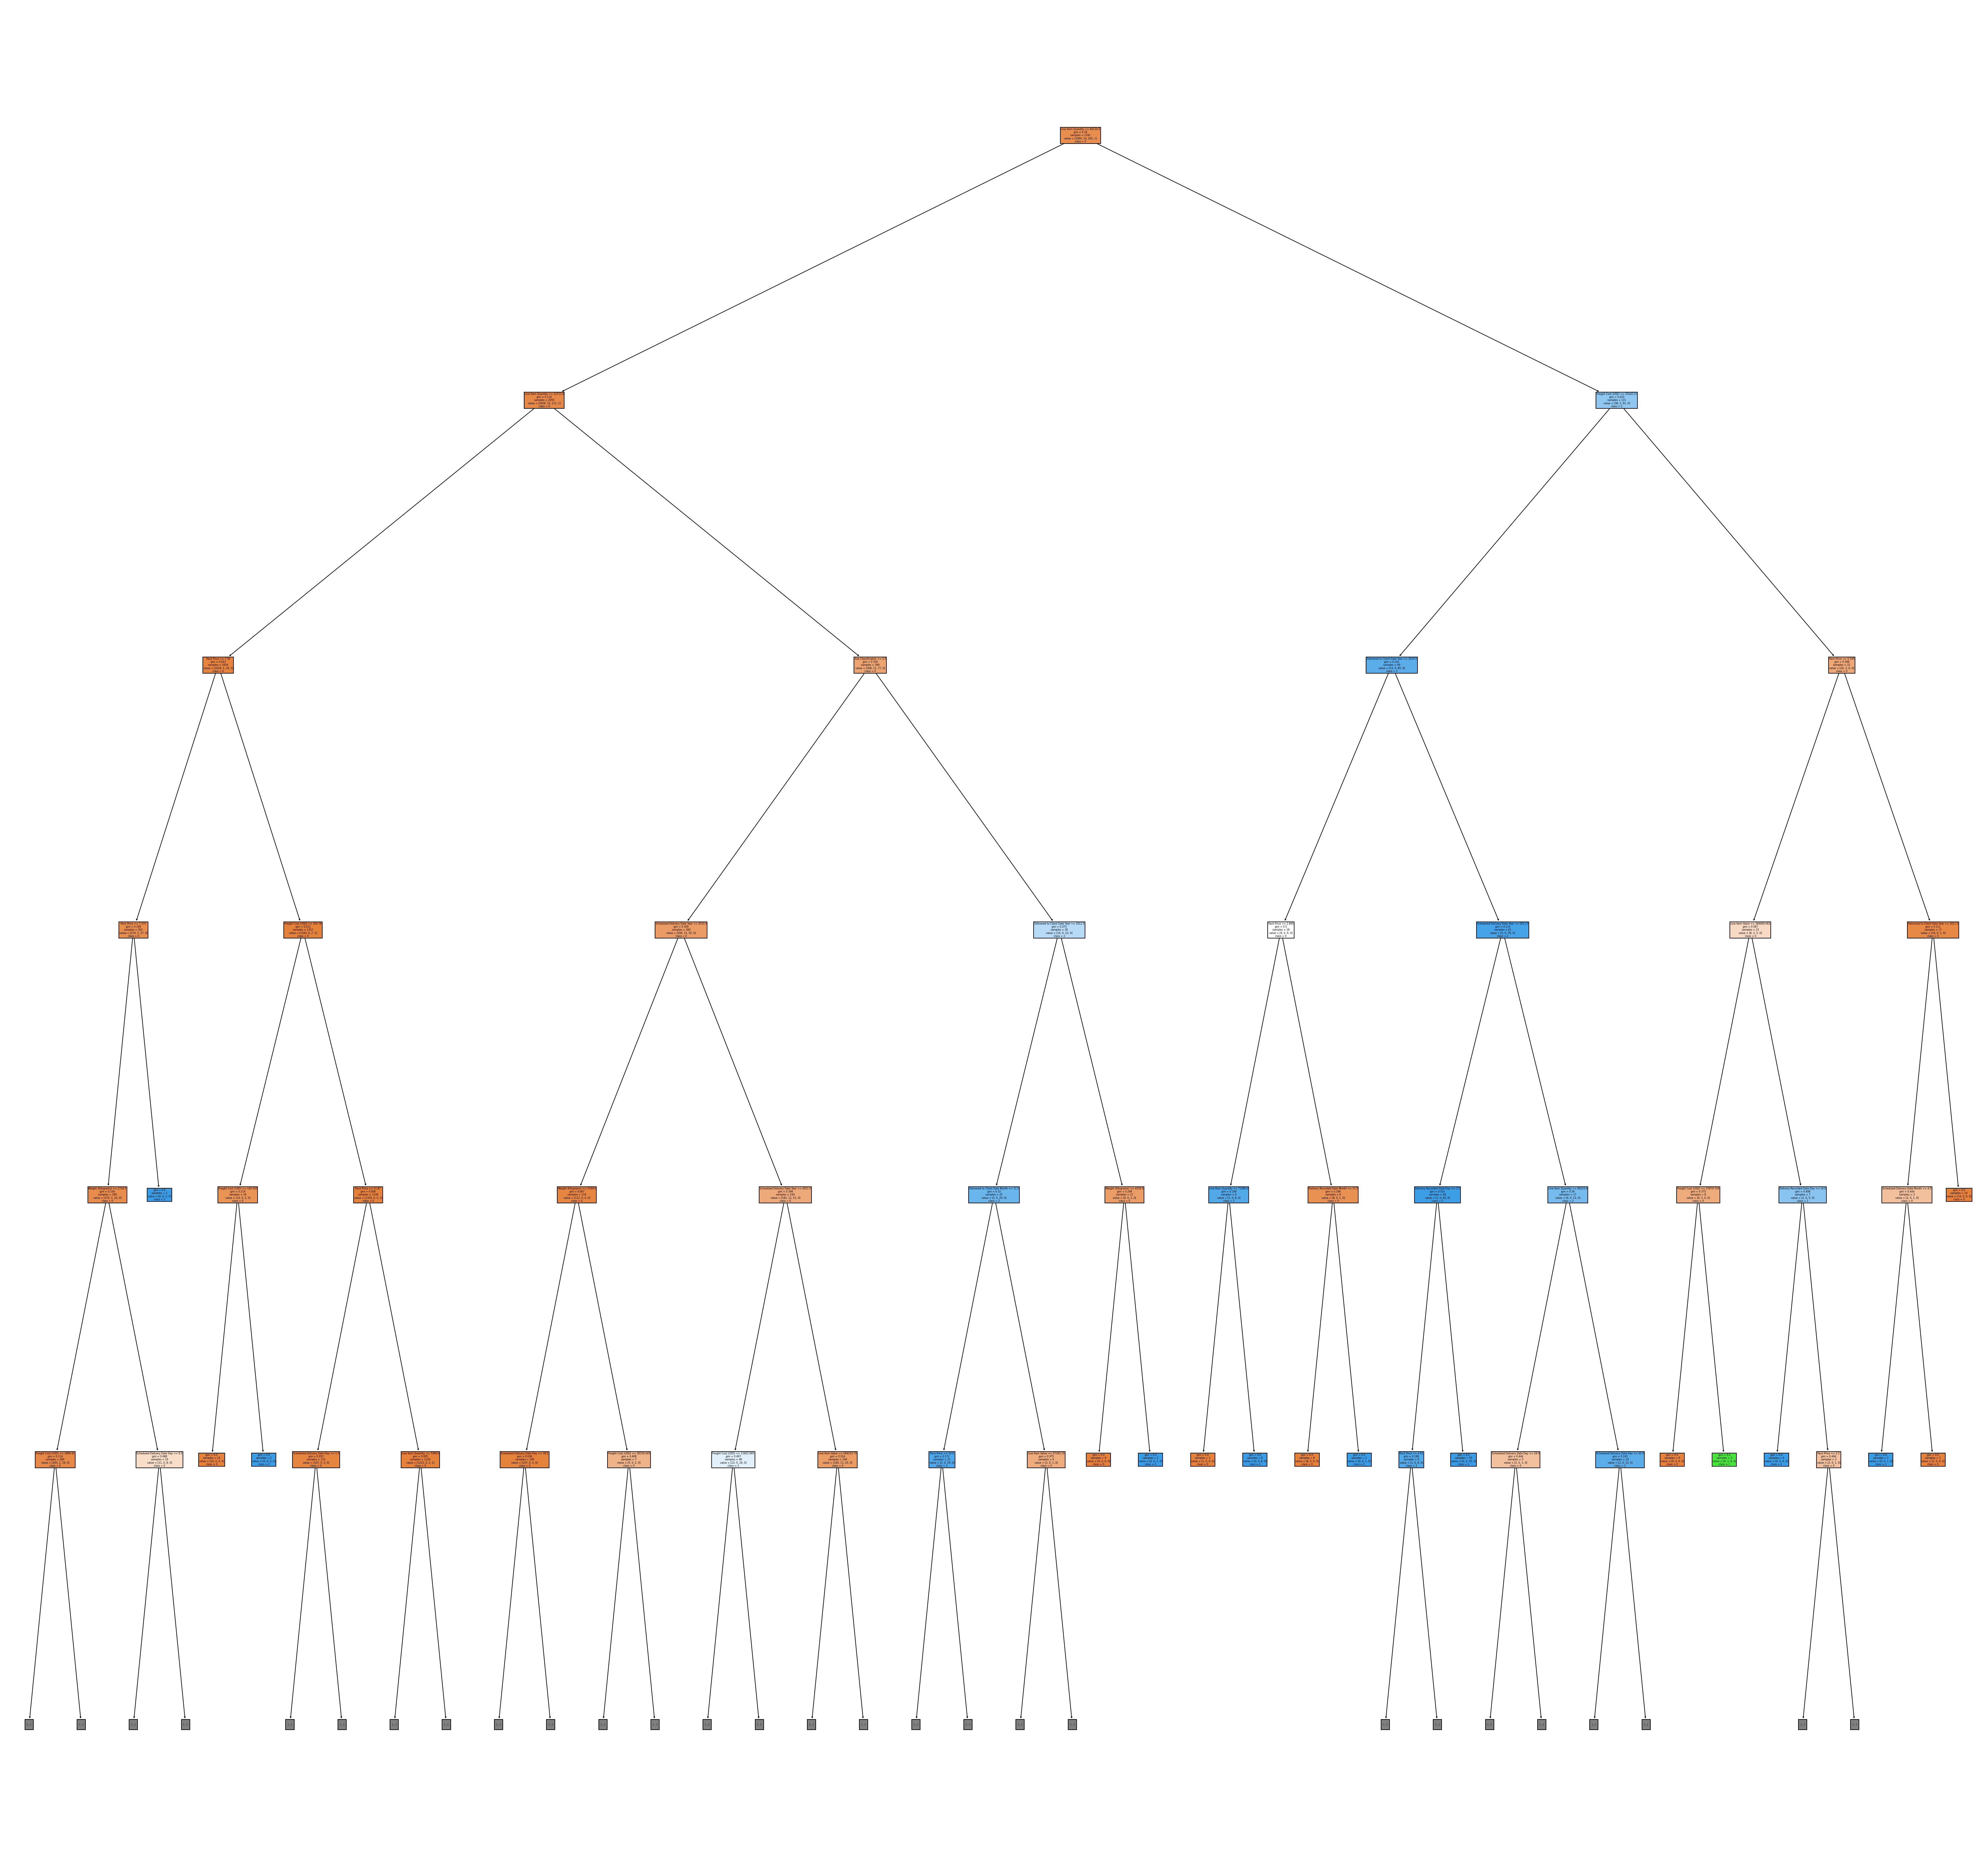

In [179]:
# Visualizing tree
fig=plt.figure(figsize=(85,80))
_=tree.plot_tree(model,max_depth=5,feature_names=x_train.columns,class_names=['0','1','2','3'],filled=True)

# XGboost


In [299]:
xtrain=x[['Sub Classification','Unit of Measure (Per Pack)','Scheduled Delivery Date Year','Scheduled Delivery Date Month','Scheduled Delivery Date Day','Delivered to Client Date Year','Delivered to Client Date Month','Delivered to Client Date Day','Delivery Recorded Date Year','Delivery Recorded Date Month','Delivery Recorded Date Day','Line Item Quantity','Line Item Value','Pack Price','First Line Designation','Weight (Kilograms)','Freight Cost (USD)']]
ytrain=x['Shipment Mode']

In [300]:
x_train=xtrain.iloc[:, ]
y_train=ytrain.iloc[:,]

In [301]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [302]:
print(xtrain['Freight Cost (USD)'].head())


2879      334.65
6226    14419.86
5195     8169.70
6125    21348.51
1009     5761.87
Name: Freight Cost (USD), dtype: float64


In [303]:
model_mode = xgb.XGBClassifier(use_label_encoder=False, 
                          eval_metric='logloss', 
                          enable_categorical=True, 
                          tree_method='hist')  # or 'gpu_hist' if you have GPU support

model_mode.fit(xtrain, ytrain)


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [305]:
print('Testing Accuracy:',model_mode.score(xtest,ytest))


Testing Accuracy: 0.9656593406593407


In [306]:
predictions=model_mode.predict(xtest)

In [307]:
matrix=confusion_matrix(ytest,predictions)
matrix

array([[647,   0,   3],
       [  0,   3,   0],
       [ 22,   0,  53]], dtype=int64)

In [308]:
value_counts=dict(x['Shipment Mode'].value_counts())
print(value_counts)

{0: 2614, 2: 277, 1: 17, 3: 1}


In [309]:
for key,value in value_counts.items():
    value_counts[key]=value/len(x)
    
print(value_counts)

{0: 0.8985905809556549, 2: 0.09522172567892746, 1: 0.005843932622894466, 3: 0.00034376074252320387}


In [310]:
class_weights={}
for key,value in value_counts.items():
    class_weights[key]=sum(value_counts.values())-value/sum(value_counts.values())    
class_weights

{0: 0.10140941904434553,
 2: 0.9047782743210728,
 1: 0.9941560673771057,
 3: 0.999656239257477}

In [311]:
y_pred=model_mode.predict(xtest)

In [312]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.9656593406593407


In [313]:
predictions=model_mode.predict(xtest)


In [314]:
matrix=confusion_matrix(ytest,predictions)
matrix

array([[647,   0,   3],
       [  0,   3,   0],
       [ 22,   0,  53]], dtype=int64)

<Axes: >

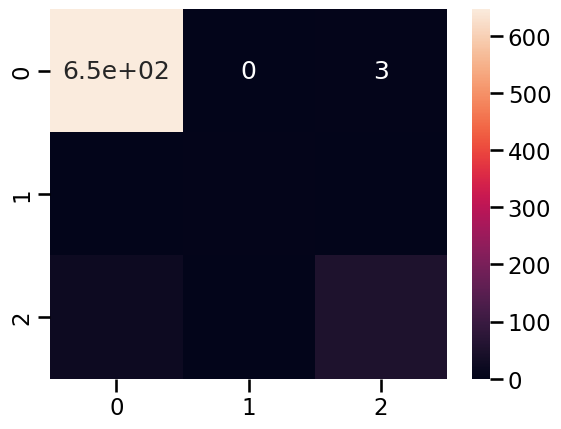

In [315]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

In [316]:
from sklearn.metrics import classification_report
print(classification_report(predictions, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       669
           1       1.00      1.00      1.00         3
           2       0.71      0.95      0.81        56

    accuracy                           0.97       728
   macro avg       0.90      0.97      0.93       728
weighted avg       0.97      0.97      0.97       728



In [317]:
with open('model_mode.pkl', 'wb') as file:
    pickle.dump(model_mode, file)

print("Model saved model_mode.pkl")

Model saved model_mode.pkl


In [245]:

from sklearn.ensemble import RandomForestClassifier


#### Random Forest


In [262]:
xtrain=x[['Sub Classification','Unit of Measure (Per Pack)','Scheduled Delivery Date Year','Scheduled Delivery Date Month','Scheduled Delivery Date Day','Delivered to Client Date Year','Delivered to Client Date Month','Delivered to Client Date Day','Delivery Recorded Date Year','Delivery Recorded Date Month','Delivery Recorded Date Day','Line Item Quantity','Line Item Value','Pack Price','First Line Designation','Weight (Kilograms)','Freight Cost (USD)']]
ytrain=x['Shipment Mode']

In [263]:
x_train=xtrain.iloc[:, ]
y_train=ytrain.iloc[:,]

In [264]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.20,random_state=42)

In [265]:
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV

In [268]:
param_grid = {
    'n_estimators': [1200,1300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [8, 9],
    'max_leaf_nodes': [8, 9],
}

In [266]:
from sklearn.ensemble import RandomForestRegressor  
# create regressor object
regressor = RandomForestClassifier()  
# fit the regressor with x and y data
regressor.fit(xtrain,ytrain) 

RandomForestClassifier()

In [269]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(xtrain, ytrain)
print(grid_search.best_estimator_)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



RandomForestClassifier(max_depth=8, max_features=None, max_leaf_nodes=9,
                       n_estimators=1300)


In [270]:
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(xtrain, ytrain)
y_pred_grid = model.predict(xtest)
print(classification_report(y_pred_grid, ytest))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       514
           1       0.00      0.00      0.00         4
           2       0.72      0.69      0.70        64

    accuracy                           0.93       582
   macro avg       0.56      0.55      0.56       582
weighted avg       0.92      0.93      0.93       582



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

In [240]:
from sklearn.ensemble import RandomForestRegressor  
# create regressor object
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)  
# fit the regressor with x and y data
regressor.fit(xtrain,ytrain)  

RandomForestRegressor(n_estimators=1000, random_state=42)

In [267]:
print("Testing Accuracy:",regressor.score(xtest,ytest))


Testing Accuracy: 0.9604810996563574


In [ ]:
predictions=regressor.predict(xtest)

In [292]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Extra work XG Boost 

In [285]:
import xgboost as xgb

In [286]:
xtrain=x[['Sub Classification','Unit of Measure (Per Pack)','Scheduled Delivery Date Year','Scheduled Delivery Date Month','Scheduled Delivery Date Day','Delivered to Client Date Year','Delivered to Client Date Month','Delivered to Client Date Day','Delivery Recorded Date Year','Delivery Recorded Date Month','Delivery Recorded Date Day','Line Item Quantity','Line Item Value','Pack Price','First Line Designation','Weight (Kilograms)']]
ytrain=x['Shipment Mode']

In [287]:
x_train=xtrain.iloc[:, ]
y_train=ytrain.iloc[:,]

In [288]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.20,random_state=42)

In [289]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [290]:
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [1000, 1100, 1200],
              'num_class': [10]
              }

In [293]:
xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

In [294]:
clf.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           objective='multi:softmax',
                                           predictor=None, ...),
                   n_iter=25, n_jobs=4,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [1000, 1100, 1200],
                                        'num_class': [10],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [318]:
print(clf.best_params_)

{'subsample': 0.6, 'num_class': 10, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7999999999999999}


In [297]:
print("{'subsample': 0.5, 'num_class': 10, 'n_estimators': 1100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7999999, 'colsample_bylevel': 0.79999999}'")

{'subsample': 0.5, 'num_class': 10, 'n_estimators': 1100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7999999, 'colsample_bylevel': 0.79999999}'


In [298]:
print("Testing Accuracy:",clf.score(xtest,ytest))

Testing Accuracy: 0.9604810996563574


In [347]:
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       531
           2       0.74      0.88      0.80        51

    accuracy                           0.96       582
   macro avg       0.86      0.93      0.89       582
weighted avg       0.97      0.96      0.96       582



<AxesSubplot: >

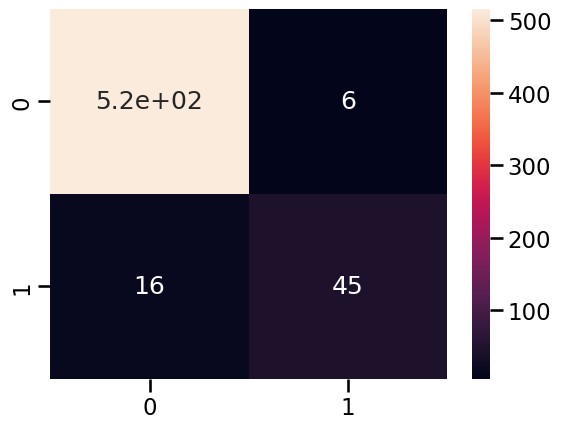

In [348]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [313]:
# gsearch1 = GridSearchCV(estimator =xgb.XGBClassifier( learning_rate =0.1, 
#  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27), 
#  param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

In [314]:
# gsearch1.fit(xtrain,ytrain)

In [315]:
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [278]:
my_model = xgb.XGBClassifier()
my_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [283]:
y_pred = my_model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
cm

array([[513,   8],
       [ 14,  47]], dtype=int64)

In [162]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 1.0, learning_rate = 0.1,
#                 max_depth = 8, alpha =10, n_estimators = 200)

In [163]:
# xg_reg.fit(xtrain,ytrain)

In [164]:
# preds = xg_reg.predict(xtest)

In [185]:
from xgboost import XGBRegressor


# Predict the total cost to transport goods.

In [193]:
xtrain=x[['Shipment Mode','Sub Classification','Unit of Measure (Per Pack)','Line Item Quantity','Line Item Value','Pack Price','First Line Designation','Weight (Kilograms)']]
ytrain=x['Freight Cost (USD)']

In [194]:
x_train=xtrain.iloc[:, ]
y_train=ytrain.iloc[:,]

In [195]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [214]:
from sklearn.model_selection import GridSearchCV

model = XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=3, verbose=1, n_jobs=-1)

grid_search.fit(xtrain, ytrain)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.6}


In [255]:
model = XGBRegressor(**best_params)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

In [264]:
print('Testing Accuracy:',model.score(xtest,ytest))

Testing Accuracy: 0.94910792684542499


In [220]:
predictions=model.predict(xtest)

In [223]:
predictions

array([  4386.5957 ,   7376.1626 ,    908.3528 ,  13583.622  ,
        27778.428  ,  26635.154  ,   3204.2798 ,  12667.812  ,
        11032.34   ,  10716.387  ,   1064.9244 ,   2051.2834 ,
         9850.4375 ,   9772.661  ,   3991.335  ,   3476.8855 ,
        13916.628  ,   3519.0166 ,  33238.785  ,    978.6971 ,
         1527.9259 ,  10042.443  ,   7414.3184 ,   4121.2617 ,
          941.0666 ,   8049.2686 ,   1507.905  ,   5715.108  ,
         1698.8785 ,  18760.39   ,   3680.399  ,  22350.217  ,
         6969.841  ,   9639.254  ,    923.118  ,  16310.823  ,
         7644.3276 ,  20446.443  ,  10395.313  ,  10395.313  ,
        13045.692  ,  15777.86   ,  13130.065  ,   9785.497  ,
         1611.2512 ,  10019.243  ,  20384.982  ,   1278.8062 ,
         5021.6025 ,   1887.6387 ,  25814.365  ,   2221.2039 ,
         1161.8654 ,   1316.1536 ,  82235.87   ,   3007.9043 ,
        22906.059  ,  19348.713  ,   8238.12   ,   7503.1743 ,
         3769.0405 ,  25603.18   ,   3538.7244 ,  15127

In [254]:
import pickle

## Regression Model
#### Estimation of the Date on which the goods will be delievered

In [242]:
from sklearn.ensemble import RandomForestRegressor


In [243]:
x.head(5)

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Sub Classification,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
13,107-RW-T01,Rwanda,0,12/22/06,1,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,...,47.04,2007,2,27,2007,2,29,2007,2,29
18,109-TZ-T01,Tanzania,0,4/12/07,5,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,Videx,2g,Powder for oral solution,...,47.04,2007,6,6,2007,6,8,2007,6,8
19,102-NG-T01,Nigeria,0,5/13/07,2,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,...,128.00,2007,6,19,2007,6,21,2007,6,21
20,102-NG-T01,Nigeria,0,5/17/07,2,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",Stat-Pak,300mg,Test kit,...,47.04,2007,6,19,2007,6,21,2007,6,21
22,108-VN-T01,Vietnam,0,7/4/07,5,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,...,3.07,2007,10,15,2007,10,17,2007,10,17


In [244]:
trainx=x[['Shipment Mode','Scheduled Delivery Date Year','Scheduled Delivery Date Month','Scheduled Delivery Date Day']]
trainy=x['Delivered to Client Date Day']

In [245]:
X=trainx.iloc[:, ].values
Y=trainy.iloc[:,].values


In [246]:
print(X)
print(Y)

[[   0 2007    2   27]
 [   0 2007    6    6]
 [   0 2007    6   19]
 ...
 [   0 2012   10    8]
 [   0 2010    9    7]
 [   0 2013    4   11]]
[29  8 21 ... 10 19 13]


In [247]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=25)


In [248]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2327, 4)
(582, 4)
(2327,)
(582,)


In [249]:
model_date = RandomForestRegressor(n_estimators=100, random_state=20)
model_date.fit(X_train,Y_train)

RandomForestRegressor(random_state=20)

In [250]:
p=model_date.predict(X_test).astype(int)
p

array([29,  5, 32, 28, 31, 31, 31,  7, 22,  7, 13,  6, 16, 11, 14, 24, 19,
        3, 31, 26, 11, 15,  7, 20,  6, 26, 18, 28, 22, 23, 28,  6, 29,  3,
       19, 31, 10,  9, 28,  3,  6, 21, 23, 28, 24,  3, 20,  9, 19, 31, 27,
       24, 13, 15, 13, 14, 31,  5,  9, 28, 15,  7, 13, 21, 20, 16,  6, 10,
       12, 12, 21, 28, 11,  7, 15, 16, 27, 13, 27, 29, 22, 20,  4, 19, 19,
       12, 25, 15, 18, 10, 31,  6,  4, 24, 14, 31,  5, 11,  7, 32, 19,  7,
        3, 11, 19,  8, 13, 31, 24, 22, 24, 24, 13, 22, 20, 20, 14, 33,  7,
       14,  7, 23, 18, 29, 20,  9,  6, 22, 31, 23, 26,  9, 10, 18, 29, 22,
       14, 15, 23, 25, 17, 13, 29, 26, 18, 18, 19,  6, 16, 24, 15, 31, 26,
       11, 12, 22, 16, 32, 23, 10, 19, 16, 16, 11, 31,  9, 11, 15, 27, 11,
        5, 24, 27, 10, 19,  3, 20, 25, 21, 15,  3, 12, 32, 18, 10,  3, 13,
       28,  5, 19,  9, 25, 14, 12, 21, 21, 22,  6, 29,  3, 22, 20,  5, 22,
       30,  9,  3, 18, 12, 10, 19, 26,  5, 27, 20, 28, 28,  3, 19, 28, 29,
       26, 29, 27, 21, 16

In [252]:
model_date.score(X_test,Y_test)


0.8520295494977929

In [253]:
model_date.predict([[0,2022,1,7]]).reshape(-1,1).astype(int)

array([[8]])

In [320]:
with open('model_date.pkl', 'wb') as file:
    pickle.dump(model_date, file)

print("Model saved model_date.pkl")

Model saved model_date.pkl


In [453]:
x.head(5)

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Sub Classification,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
13,107-RW-T01,Rwanda,0,12/22/06,1,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,...,47.04,2007,2,27,2007,2,29,2007,2,27
18,109-TZ-T01,Tanzania,0,4/12/07,5,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,Videx,2g,Powder for oral solution,...,47.04,2007,6,6,2007,6,8,2007,6,6
19,102-NG-T01,Nigeria,0,5/13/07,2,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,...,128.00,2007,6,19,2007,6,21,2007,6,19
20,102-NG-T01,Nigeria,0,5/17/07,2,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",Stat-Pak,300mg,Test kit,...,47.04,2007,6,19,2007,6,21,2007,6,19
22,108-VN-T01,Vietnam,0,7/4/07,5,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,...,3.07,2007,10,15,2007,10,17,2007,10,15


In [577]:
x.columns

Index(['Project Code', 'Country', 'Shipment Mode', 'PO Sent to Vendor Date',
       'Sub Classification', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)',
       'Scheduled Delivery Date Year', 'Scheduled Delivery Date Month',
       'Scheduled Delivery Date Day', 'Delivered to Client Date Year',
       'Delivered to Client Date Month', 'Delivered to Client Date Day',
       'Delivery Recorded Date Year', 'Delivery Recorded Date Month',
       'Delivery Recorded Date Day'],
      dtype='object')

In [733]:
print(x['Unit Price'])

13      0.17
18      0.06
19      0.80
20      1.35
22      0.01
        ... 
6563    0.04
6566    0.23
6570    0.04
6573    0.16
6578    0.06
Name: Unit Price, Length: 2909, dtype: float64


In [744]:
trainx=x[['Pack Price','Line Item Insurance (USD)','Unit Price','Line Item Quantity','Line Item Value']]
trainy=x['Weight (Kilograms)']

In [745]:
X=trainx.iloc[:, ].values.astype(int)
Y=trainy.iloc[:,].values.astype(int)

In [746]:
print(X)
print(Y)

[[     9     47      0  10000  99800]
 [    12     47      0    712   8964]
 [    80    128      0   1000  80000]
 ...
 [     2     28      0   8586  20005]
 [     4    135      0  39049 182358]
 [    12      1      0     98   1233]]
[7416  162  341 ...  544 3669   22]


In [747]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [748]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2327, 5)
(582, 5)
(2327,)
(582,)


In [749]:
# Linear Regression
model_weight=LinearRegression(fit_intercept=True,positive=True)
model_weight.fit(X_train,Y_train)
print(model_weight.coef_.astype(int))
model_weight.intercept_.astype(int)

[ 0  3 59  0  0]


243

In [751]:
model_weight.predict([[9.98,47.04,0.6,712,9980.00]]).astype(int)

array([504])

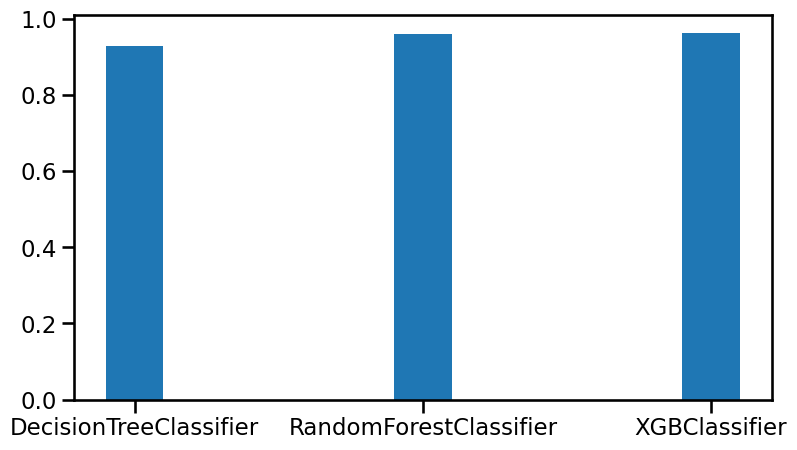

In [346]:
import numpy as np
import matplotlib.pyplot as plt
data = {'DecisionTreeClassifier':0.9285714285714286, 'RandomForestClassifier':0.9604810996563574, 'XGBClassifier':0.9621993127147767}
courses = list(data.keys())
values = list(data.values())  
fig = plt.figure(figsize = (9, 5))
plt.bar(courses, values, 
        width = 0.2) 
plt.show()